In [1]:
import matplotlib
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
import numpy as np
plots.style.use('fivethirtyeight')

## Standard Units

In [2]:
exams = Table.read_table('exams_fa18.csv')
exams.show(5)

Midterm,Final
91,88
89.5,84
78,71.5
87,88
72,72.5


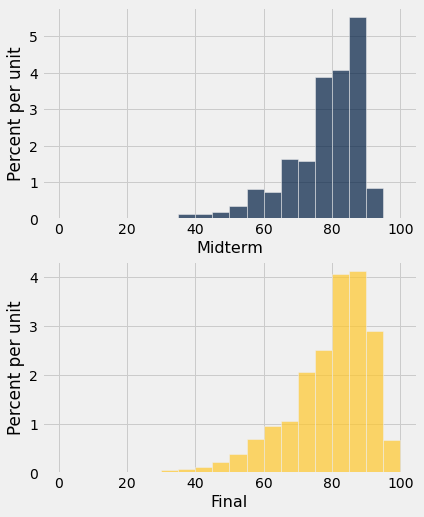

In [3]:
exams.hist(overlay=False, bins=np.arange(0,101,5))

In [4]:
def standard_units(x):
    """Convert array of values to standard units"""
    return (x - np.average(x)) / np.std(x)

In [5]:
midterm_su = standard_units(exams.column('Midterm'))
exams = exams.with_column('Midterm in Standard Units', midterm_su)

final_su = standard_units(exams.column('Final'))
exams = exams.with_column('Final in Standard Units', final_su)

exams.show(10)

Midterm,Final,Midterm in Standard Units,Final in Standard Units
91,88,1.16278,0.717241
89.5,84,1.03032,0.390935
78,71.5,0.0147889,-0.628768
87,88,0.809552,0.717241
72,72.5,-0.515053,-0.547191
71.5,61,-0.559206,-1.48532
82,92.5,0.368017,1.08433
84.5,87,0.588784,0.635664
85,92,0.632938,1.04355
78,71,0.0147889,-0.669556


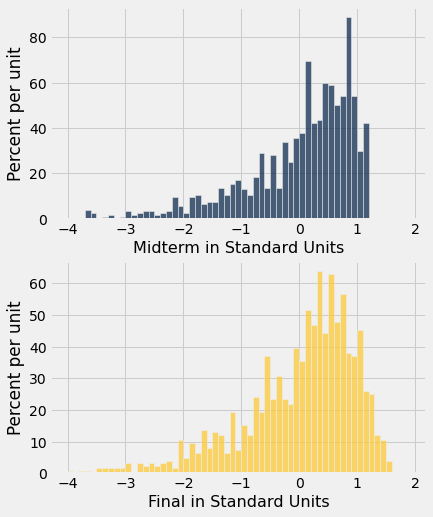

In [6]:
exams.select(
    'Midterm in Standard Units', 'Final in Standard Units'
).hist(overlay=False, bins=np.arange(-4,2,0.1))

## The SD and Bell Shaped Curves

In [7]:
births = Table.read_table('baby.csv')

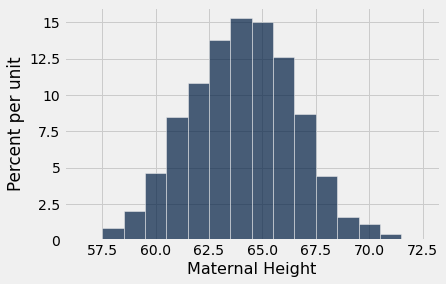

In [8]:
births.hist('Maternal Height', bins = np.arange(56.5, 72.6, 1))

In [9]:
heights = births.column('Maternal Height')
np.mean(heights), np.std(heights)

(64.04940374787053, 2.5250254409674375)

In [10]:
# 1 SD below & above the mean
np.mean(heights) - np.std(heights), np.mean(heights) + np.std(heights)

(61.52437830690309, 66.57442918883797)

## Central Limit Theorem ##

In [11]:
united = Table.read_table('united.csv')
united

Date,Flight Number,Destination,Delay
6/1/15,73,HNL,257
6/1/15,217,EWR,28
6/1/15,237,STL,-3
6/1/15,250,SAN,0
6/1/15,267,PHL,64
6/1/15,273,SEA,-6
6/1/15,278,SEA,-8
6/1/15,292,EWR,12
6/1/15,300,HNL,20
6/1/15,317,IND,-10


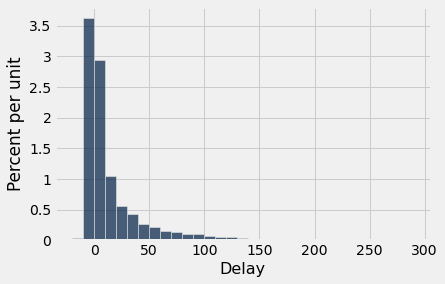

In [12]:
united_bins = np.arange(-20, 300, 10)
united.hist('Delay', bins=united_bins)

In [13]:
delays = united.column('Delay')
delay_mean = np.mean(delays)
delay_sd = np.std(delays)
delay_mean, delay_sd

(16.658155515370705, 39.480199851609314)

In [14]:
percentile(50, delays)

2

In [15]:
def one_sample_mean(sample_size):
    """ 
    Takes a sample from the population of flights 
    and computes its mean
    """
    sampled_flights = united.sample(sample_size)
    return np.mean(sampled_flights.column('Delay'))

In [27]:
one_sample_mean(100)

16.81

In [28]:
def ten_thousand_sample_means(sample_size):
    means = make_array()
    for i in np.arange(10000):
        mean = one_sample_mean(sample_size)
        means = np.append(means, mean)
    return means

In [29]:
sample_means_100 = ten_thousand_sample_means(100)

In [30]:
sample_means_100

array([23.13, 16.56, 19.79, ..., 22.12, 19.17, 14.27])

In [31]:
len(sample_means_100)

10000

Population Average: 16.658155515370705


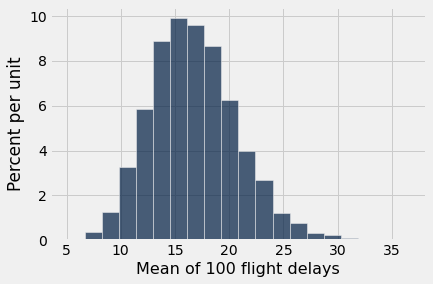

In [32]:
Table().with_column(
    'Mean of 100 flight delays', sample_means_100).hist(bins=20)

print('Population Average:', delay_mean)

Population Average: 16.658155515370705


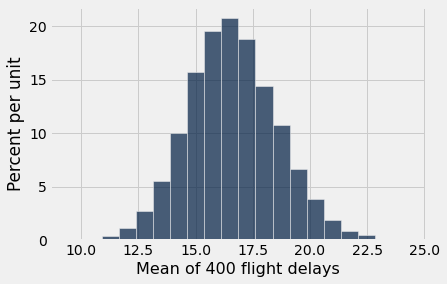

In [33]:
sample_means_400 = ten_thousand_sample_means(400)
Table().with_column(
    'Mean of 400 flight delays', sample_means_400).hist(bins=20)

print('Population Average:', delay_mean)

Population Average: 16.658155515370705


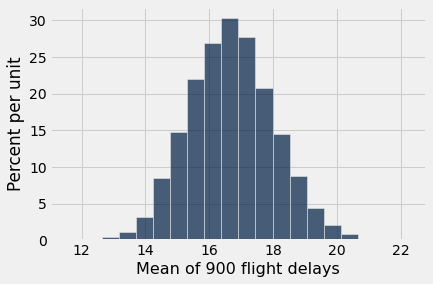

In [34]:
sample_means_900 = ten_thousand_sample_means(900)
Table().with_column(
    'Mean of 900 flight delays', sample_means_900).hist(bins=20)

print('Population Average:', delay_mean)

Population Average: 16.658155515370705


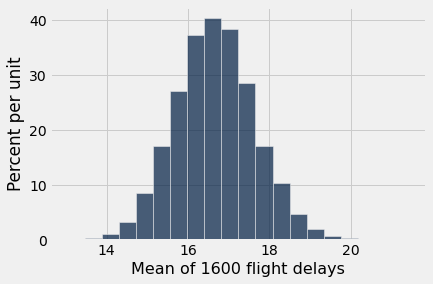

In [35]:
sample_means_1600 = ten_thousand_sample_means(1600)
Table().with_column(
    'Mean of 1600 flight delays', sample_means_1600).hist(bins=20)

print('Population Average:', delay_mean)